100%|█████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:07<00:00, 535.44it/s]


Best-fit values:
a = -0.008 ± 0.001
b = 3.915 ± 0.124
c = 1.229 ± 5.709


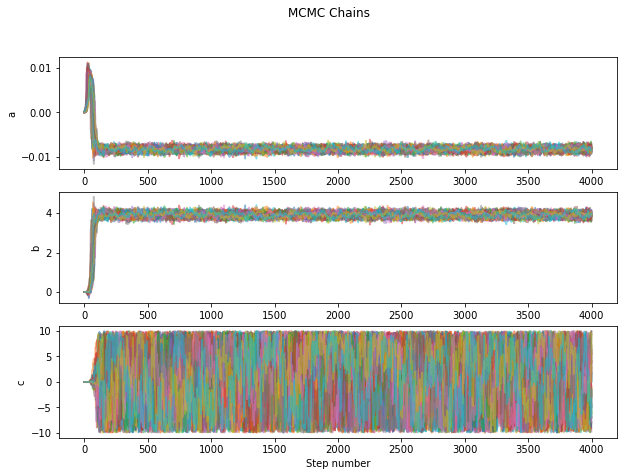

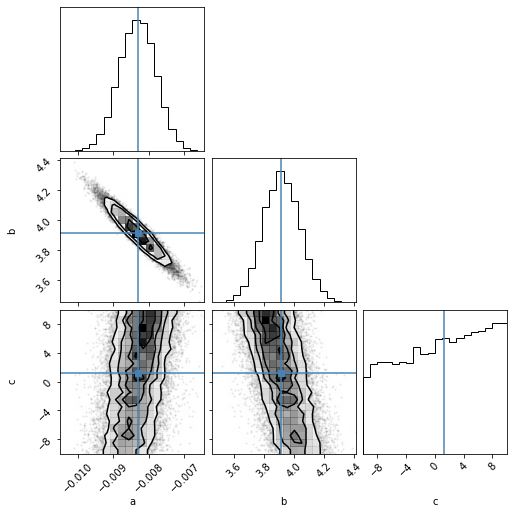

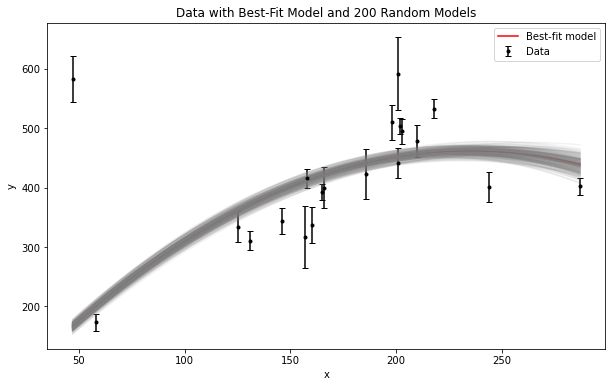

In [1]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
import corner

# Data
d = np.array([
    [201, 592, 61], [244, 401, 25], [47, 583, 38], [287, 402, 15],
    [203, 495, 21], [58, 173, 15], [210, 479, 27], [202, 504, 14],
    [198, 510, 30], [158, 416, 16], [165, 393, 14], [201, 442, 25],
    [157, 317, 52], [131, 311, 16], [166, 400, 34], [160, 337, 31],
    [186, 423, 42], [125, 334, 26], [218, 533, 16], [146, 344, 22]
])

x, y, sigma = d[:, 0], d[:, 1], d[:, 2]

def model(x, a, b, c):
    return a * x**2 + b * x + c

def log_likelihood(p, x, y, s):
    a, b, c = p
    return -0.5 * np.sum(((y - model(x, a, b, c)) / s) ** 2)

def log_prior(p):
    a, b, c = p
    return 0.0 if -10 < a < 10 and -10 < b < 10 and -10 < c < 10 else -np.inf

def log_posterior(p, x, y, s):
    lp = log_prior(p)
    return lp + log_likelihood(p, x, y, s) if np.isfinite(lp) else -np.inf

ndim, nwalkers, nsteps = 3, 50, 4000
pos = np.random.randn(nwalkers, ndim) * 1e-4

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(x, y, sigma))
sampler.run_mcmc(pos, nsteps, progress=True)

samples = sampler.get_chain(discard=100, thin=15, flat=True)
params_median = np.median(samples, axis=0)
params_sigma = np.std(samples, axis=0)

print(f"Best-fit values:\na = {params_median[0]:.3f} ± {params_sigma[0]:.3f}\nb = {params_median[1]:.3f} ± {params_sigma[1]:.3f}\nc = {params_median[2]:.3f} ± {params_sigma[2]:.3f}")

plt.figure(figsize=(10, 7))
for i in range(ndim):
    plt.subplot(ndim, 1, i+1)
    plt.plot(sampler.get_chain()[:, :, i], alpha=0.5)
    plt.ylabel(["a", "b", "c"][i])
plt.xlabel("Step number")
plt.suptitle("MCMC Chains")
plt.show()

corner.corner(samples, labels=["a", "b", "c"], truths=params_median)
plt.show()

plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=sigma, fmt=".k", capsize=3, label="Data")

x_fit = np.linspace(min(x), max(x), 1000)
plt.plot(x_fit, model(x_fit, *params_median), "r-", label="Best-fit model")

for a, b, c in samples[np.random.randint(len(samples), size=200)]:
    plt.plot(x_fit, model(x_fit, a, b, c), color="gray", alpha=0.1)

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Data with Best-Fit Model and 200 Random Models")
plt.show()

In [2]:
pip install emcee

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install corner

Note: you may need to restart the kernel to use updated packages.
